# Filling in Missing Quandl Financial Data: Bayes Rule and the EM Algorithm in Python


## Description
This notebook demostrates a single function I use to refill missing financial data in Quandl time-series. It assumes the missing data is a random variable and calculates the sufficient statistics of the dataset at the same time as MAP estimates of the missing data. 

See the accompanying file norm_refill.py for details

In [86]:
from __future__ import division
import numpy as np
import Quandl
import Quandl as qd
import pandas as pd
import numpy.random as npr
import scipy.stats as sps
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from datetime import datetime

In [83]:
import norm_refill as nr

In [84]:
Curve = Quandl.get("USTREASURY/YIELD", authtoken="XRAWhZM6uze84ykfkGDz", returns="pandas")

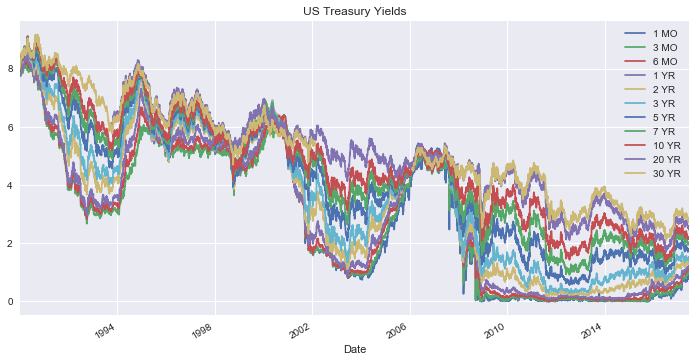

In [85]:
Curve.plot(figsize=(12,6))
plt.title("US Treasury Yields");

In [87]:
curve_copy = copy.deepcopy(Curve)
nr.refill_norm_data(curve_copy)

Filled 4835 missing observations out of 75658
3896 rows out of 6878 were missing data
Iterations : 41
Squared difference of last 2 posterior mean iterations: 9.86270801688e-10


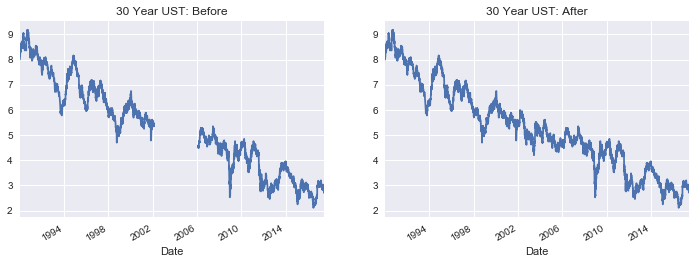

In [88]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
Curve['30 YR'].plot()
plt.title("30 Year UST: Before")

plt.subplot(122)
curve_copy['30 YR'].plot()
plt.title("30 Year UST: After")

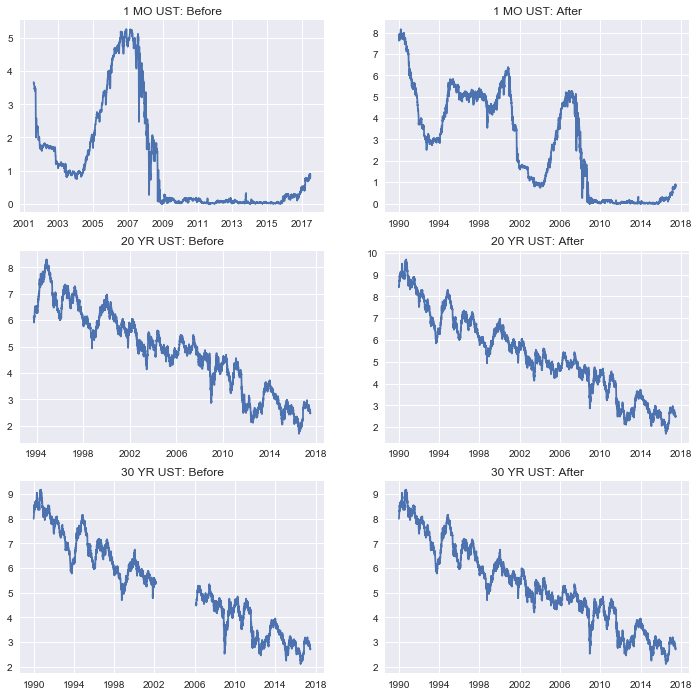

In [89]:
sec_list = ["1 MO", "20 YR", "30 YR"]
nn = 100*len(sec_list)+21

plt.figure(figsize=(12, 4*len(sec_list)))

for i, sec in enumerate(sec_list):

    plt.subplot(nn+i*2)
    plt.plot(Curve.index.values, Curve[sec].values)
    plt.title("{} UST: Before".format(sec))

    plt.subplot(nn+i*2+1)
    plt.plot(curve_copy.index.values, curve_copy[sec].values)
    plt.title("{} UST: After".format(sec))